In [23]:
pwd

'/ai-data/neuro/data/restored/patch/model_torch_valid'

In [24]:
cd /ai-data/neuro/data/restored/patch/model_torch_valid

/ai-data/neuro/data/restored/patch/model_torch_valid


In [25]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
from scipy.ndimage import affine_transform
from scipy.ndimage import rotate
from numpy.linalg import norm

In [26]:
# set the path to the npz file
file_path = 'HHHHH_CA_000062.npz'

# load the npz file
npz_data = np.load(file_path)

# print the keys in the npz file
print("Keys in the npz file:", npz_data.files)

keys_to_print = ['center', 'direction', 'data', 'mask', 'intersection_over_aneurysm']

for key in keys_to_print:
    if key in npz_data:
        shape = npz_data[key].shape
        print(f"Shape of {key}: {shape}")
    else:
        print(f"{key} not found in the npz file.")

Keys in the npz file: ['center', 'direction', 'data', 'mask', 'data_normed', 'data_upscaled', 'mask_upscaled', 'intersection_over_aneurysm']
Shape of center: (348, 3)
Shape of direction: (348, 9)
Shape of data: (348, 32, 32, 32)
Shape of mask: (348, 32, 32, 32)
Shape of intersection_over_aneurysm: (348, 1)


In [27]:
# list to store the indices of the patches that satisfy the condition
selected_indices = []

# iterate over all the patches
for i in range(len(npz_data['data'])):
    mask = npz_data['mask'][i]
    intersection_over_aneurysm = npz_data['intersection_over_aneurysm'][i][0]

    # if the patch contains the aneurysm and the intersection over aneurysm is greater than 0.8
    if np.any(mask == 1) and intersection_over_aneurysm >= 0.8:
        selected_indices.append(i)

# print the selected indices
print("Selected indices:", selected_indices)

Selected indices: [231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264]


In [28]:
selected_patch = npz_data['data'][selected_indices]
print("Shape of selected patch:", selected_patch.shape)
print("\n")

def print_selected_data_details(npz_data, selected_indices):
    for i in selected_indices:
        print(f"Index: {i}")
        # print("Data:\n", npz_data['data'][i])
        # print("Mask:\n", npz_data['mask'][i])
        print("Intersection Over Aneurysm:", npz_data['intersection_over_aneurysm'][i])
        print("Center:", npz_data['center'][i])
        print("Direction:", npz_data['direction'][i])
        print("\n")

# print the details of the selected patches
print_selected_data_details(npz_data, selected_indices)

Shape of selected patch: (25, 32, 32, 32)


Index: 231
Intersection Over Aneurysm: [1.]
Center: [-38.52260161 -38.69333658 -27.09238938]
Direction: [-0.92238635  0.17716042 -0.34324571  0.3862686   0.42304849 -0.81965026
  0.         -0.88861924 -0.45864566]


Index: 232
Intersection Over Aneurysm: [1.]
Center: [-38.79430198 -39.34214084 -27.45543601]
Direction: [-0.90034433  0.15495988 -0.40665405  0.43443799  0.37453268 -0.81913912
  0.02537153 -0.91417324 -0.40452884]


Index: 233
Intersection Over Aneurysm: [1.]
Center: [-39.1286327  -39.91408866 -27.6952533 ]
Direction: [-0.83694096  0.09209341 -0.53948923  0.54269243  0.26719494 -0.79629881
  0.07081492 -0.95923181 -0.27360479]


Index: 234
Intersection Over Aneurysm: [1.]
Center: [-39.51807426 -40.41044579 -27.82250091]
Direction: [-0.74780408  0.00655362 -0.66388712  0.65632077  0.15815203 -0.73772012
  0.10016036 -0.98739302 -0.12256801]


Index: 235
Intersection Over Aneurysm: [1.]
Center: [-39.95510716 -40.83247799 -27.84783

In [29]:
index = 252
data = npz_data['data'][index]
mask = npz_data['mask'][index]
direction = npz_data['direction'][index]
center = npz_data['center'][index]
intersection_over_aneurysm = npz_data['intersection_over_aneurysm'][index]

In [30]:
print("direction : ", direction)
print("center : ", center)
print("intersection_over_aneurysm : ", intersection_over_aneurysm)

direction :  [ 1.00000000e+00  1.18533117e-14 -2.13162821e-14  2.18574607e-14
 -4.77036791e-02  9.98861531e-01  1.08229520e-14 -9.98861531e-01
 -4.77036791e-02]
center :  [-38.4984     -36.82375418 -27.1373649 ]
intersection_over_aneurysm :  [1.]


In [31]:
# Visualizing the data for all slices
def show_all_slices(data):
    num_slices = data.shape[0]
    cols = 8  
    rows = num_slices // cols + int(num_slices % cols != 0)

    fig, axes = plt.subplots(rows, cols, figsize=(2 * cols, 2 * rows))
    axes = axes.flatten()

    for i in range(num_slices):
        axes[i].imshow(data[i, :, :], cmap='gray')
        axes[i].set_title(f'Slice {i}')
        axes[i].axis('off')
 
    for i in range(num_slices, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Visualizing the overlay of the mask on the data for all slices
def show_all_slices_with_overlay(data, mask):
    num_slices = data.shape[0]
    cols = 8  
    rows = num_slices // cols + int(num_slices % cols != 0)

    fig, axes = plt.subplots(rows, cols, figsize=(2 * cols, 2 * rows))
    axes = axes.flatten()

    for i in range(num_slices):
        axes[i].imshow(data[i, :, :], cmap='gray', interpolation='none')
        axes[i].imshow(mask[i, :, :], cmap='hot', alpha=0.5, interpolation='none')  # Overlay mask
        axes[i].set_title(f'Slice {i}')
        axes[i].axis('off')
        
    for i in range(num_slices, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

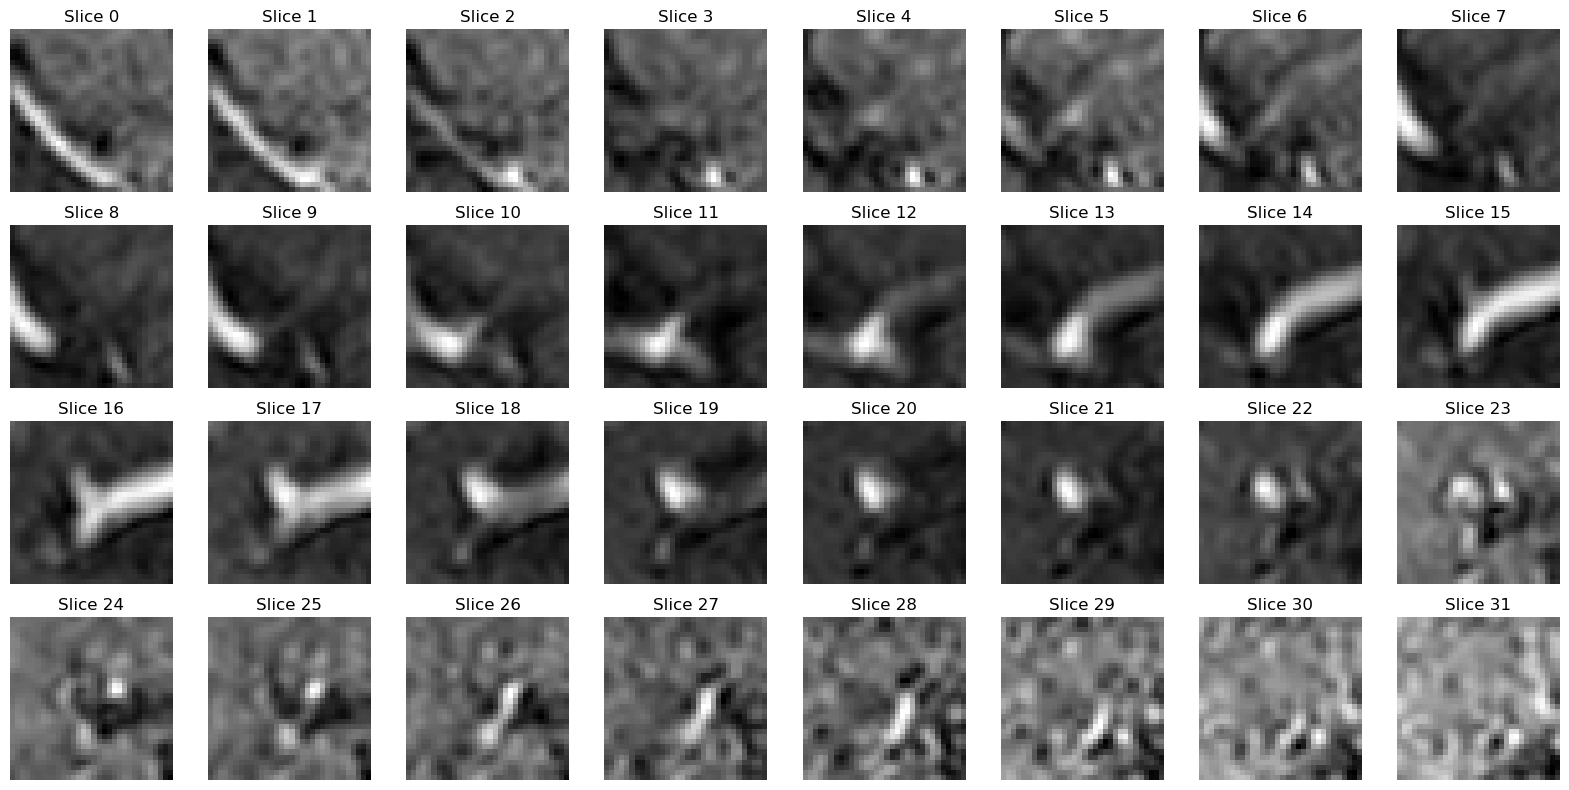

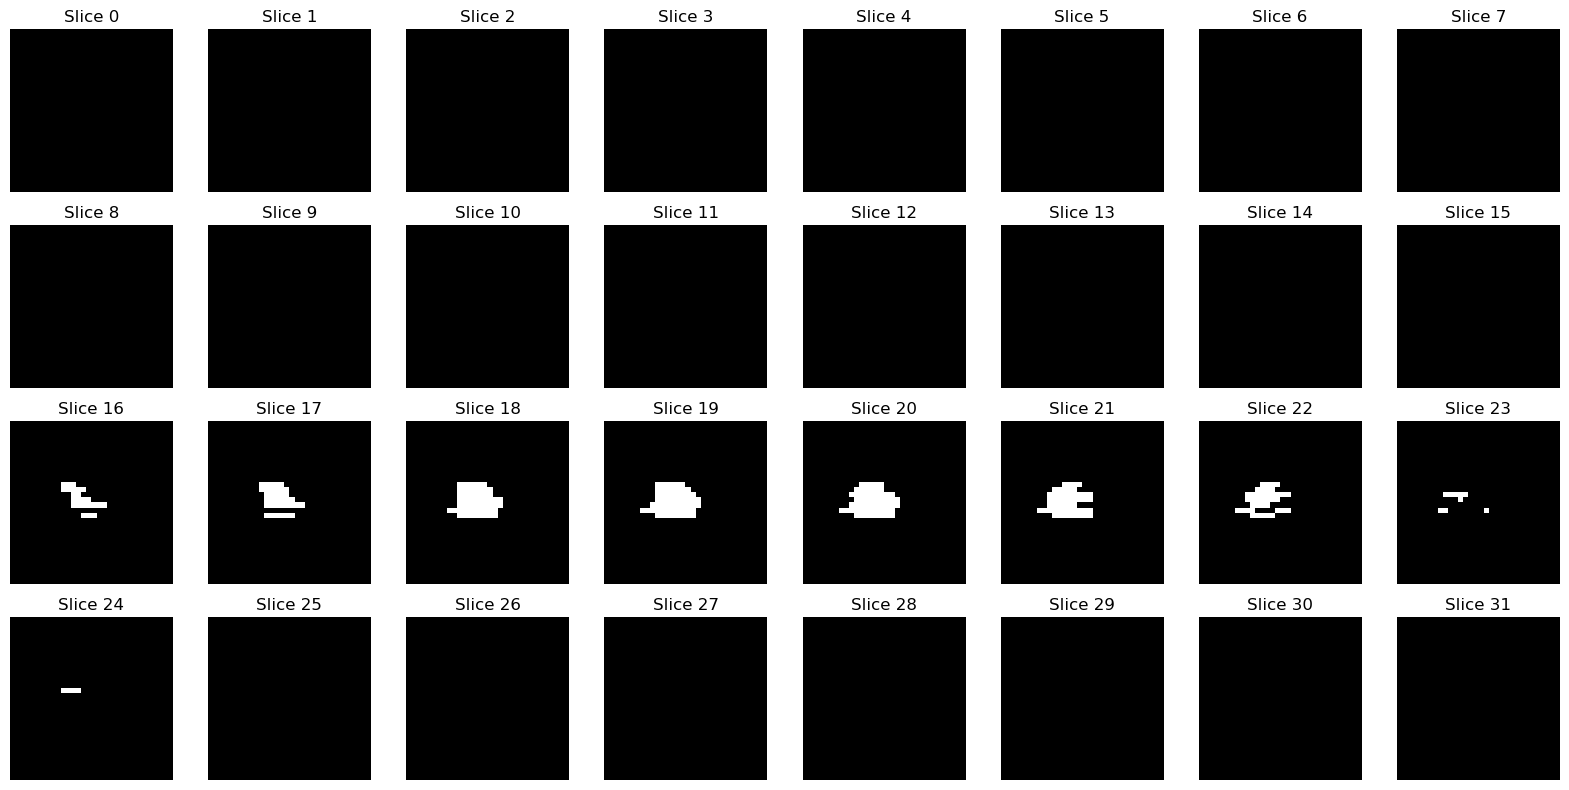

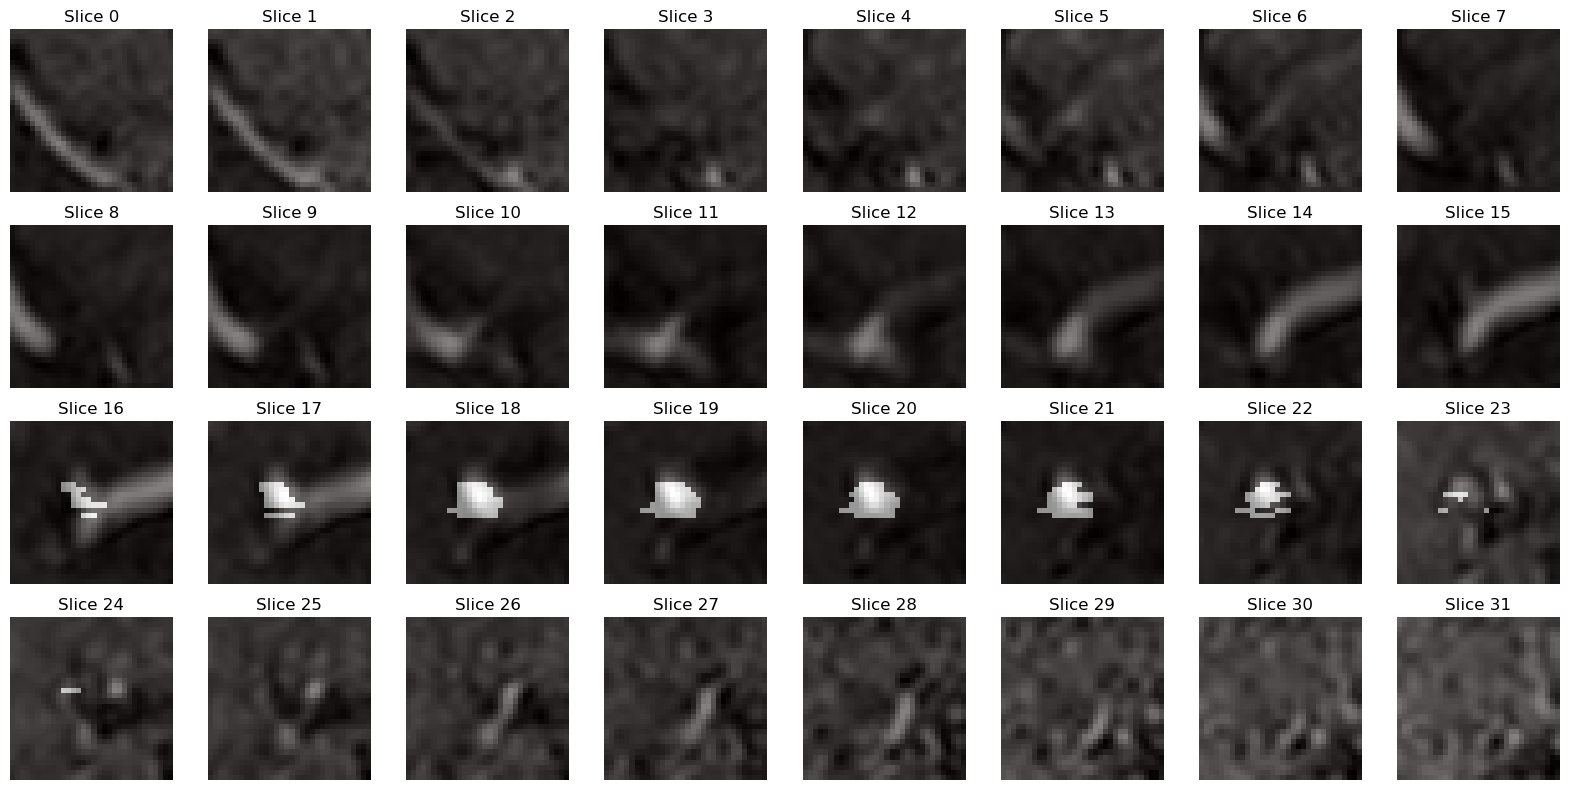

In [32]:
show_all_slices(data)
show_all_slices(mask)
show_all_slices_with_overlay(data, mask)

In [33]:
def overlay_slices(data, mask, process_all_slices=True, average_slices=False):
    overlayed_data = np.zeros_like(data[0])
    overlayed_mask = np.zeros_like(mask[0])

    # Determine which slices to process
    slice_indices = range(data.shape[0]) if process_all_slices else [i for i in range(data.shape[0]) if np.any(mask[i] == 1)]
    num_slices = len(slice_indices)

    # Overlay the slices
    for slice_index in slice_indices:
        overlayed_data += data[slice_index]
        overlayed_mask += mask[slice_index]

    if average_slices:
        # Calculate the average if required
        overlayed_data = overlayed_data / num_slices
        overlayed_mask = overlayed_mask / num_slices

    # Overlay the data on the mask
    overlayed_data_on_mask = np.where(overlayed_mask > 0, overlayed_data, 0)

    return overlayed_data, overlayed_mask, overlayed_data_on_mask

def visualize_overlay(overlayed_data, overlayed_mask, overlayed_data_on_mask):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    axes[0].imshow(overlayed_data, cmap='gray')
    axes[0].set_title("Overlayed Data")

    axes[1].imshow(overlayed_mask, cmap='gray')
    axes[1].set_title("Overlayed Mask")

    axes[2].imshow(overlayed_data, cmap='gray', interpolation='none')
    axes[2].imshow(overlayed_mask, cmap='hot', alpha=0.5, interpolation='none')
    axes[2].set_title("Overlayed Data on Mask")

    plt.show()

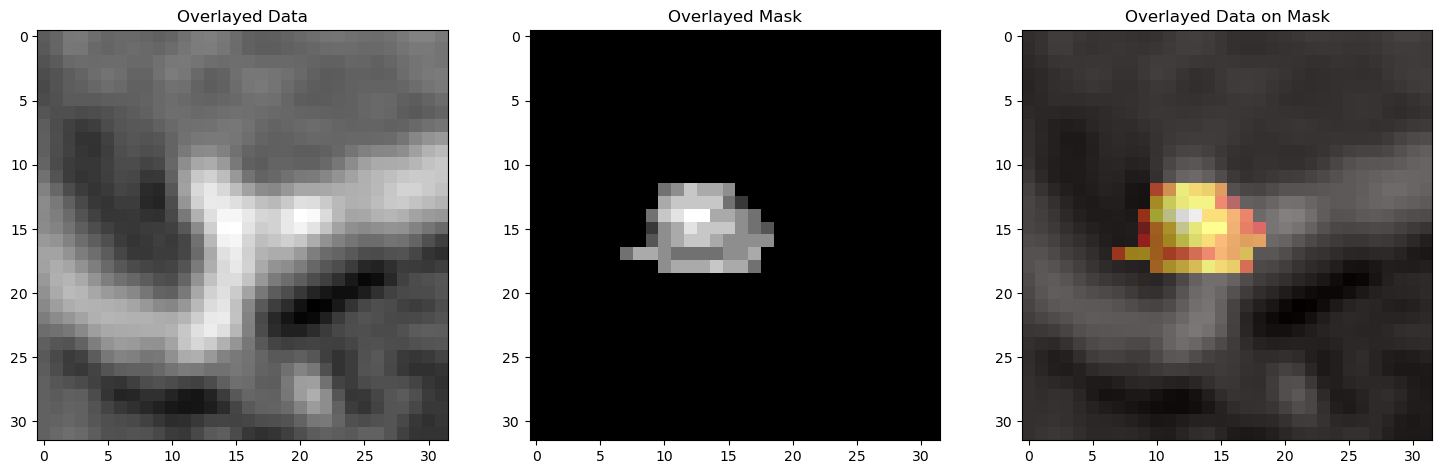

In [34]:
# overlayed data, mask, and data on mask
overlayed_data, overlayed_mask, overlayed_data_on_mask = overlay_slices(data, mask, process_all_slices=True, average_slices=False)
visualize_overlay(overlayed_data, overlayed_mask, overlayed_data_on_mask)

In [35]:
# rotate 90 degrees around the z axis
rotated_data = rotate(data, 90, axes=(0, 1), reshape=False)
rotated_mask = rotate(mask, 90, axes=(0, 1), reshape=False)

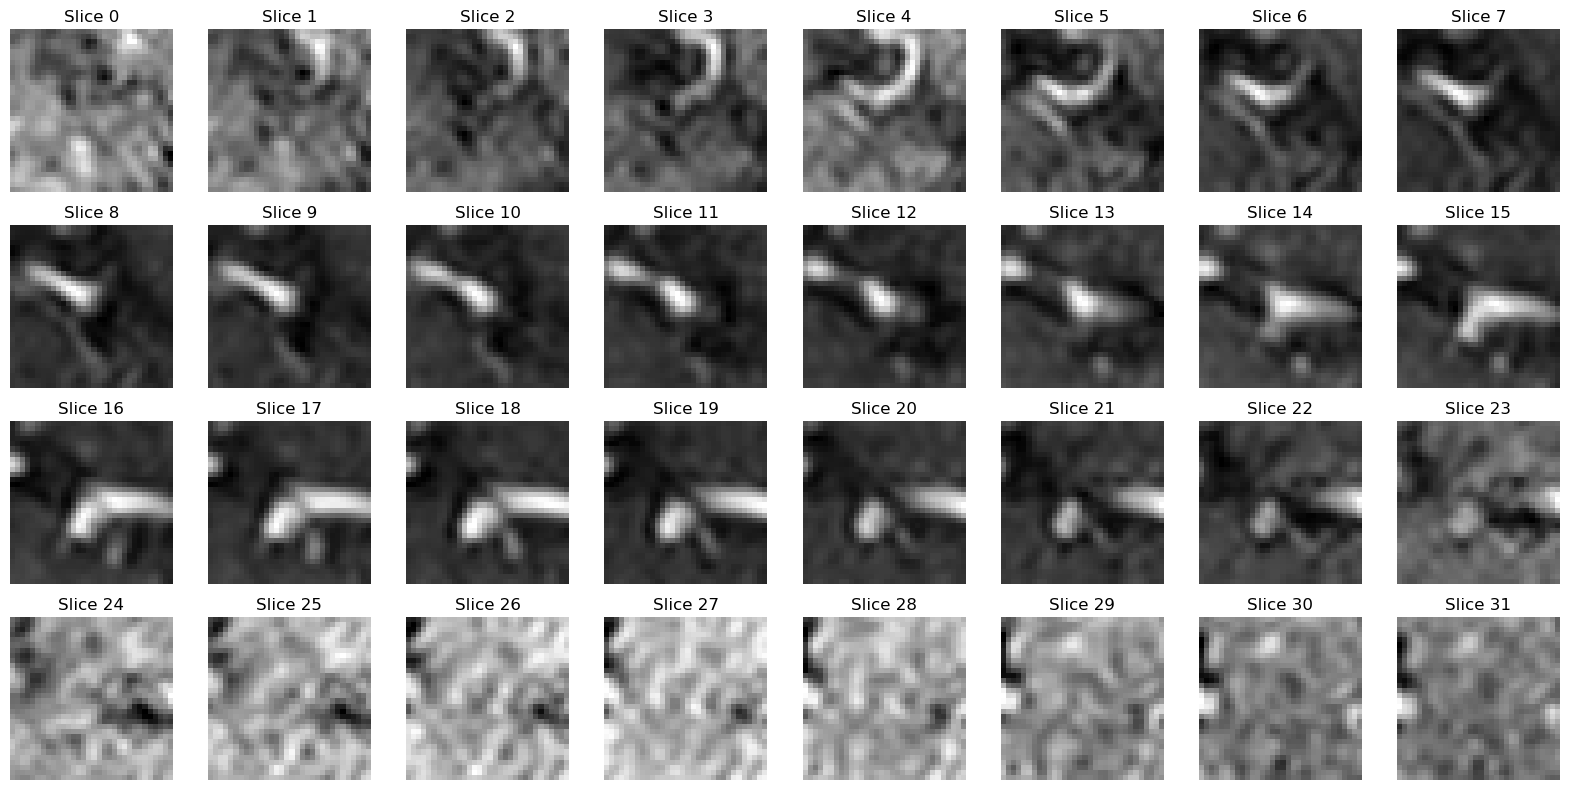

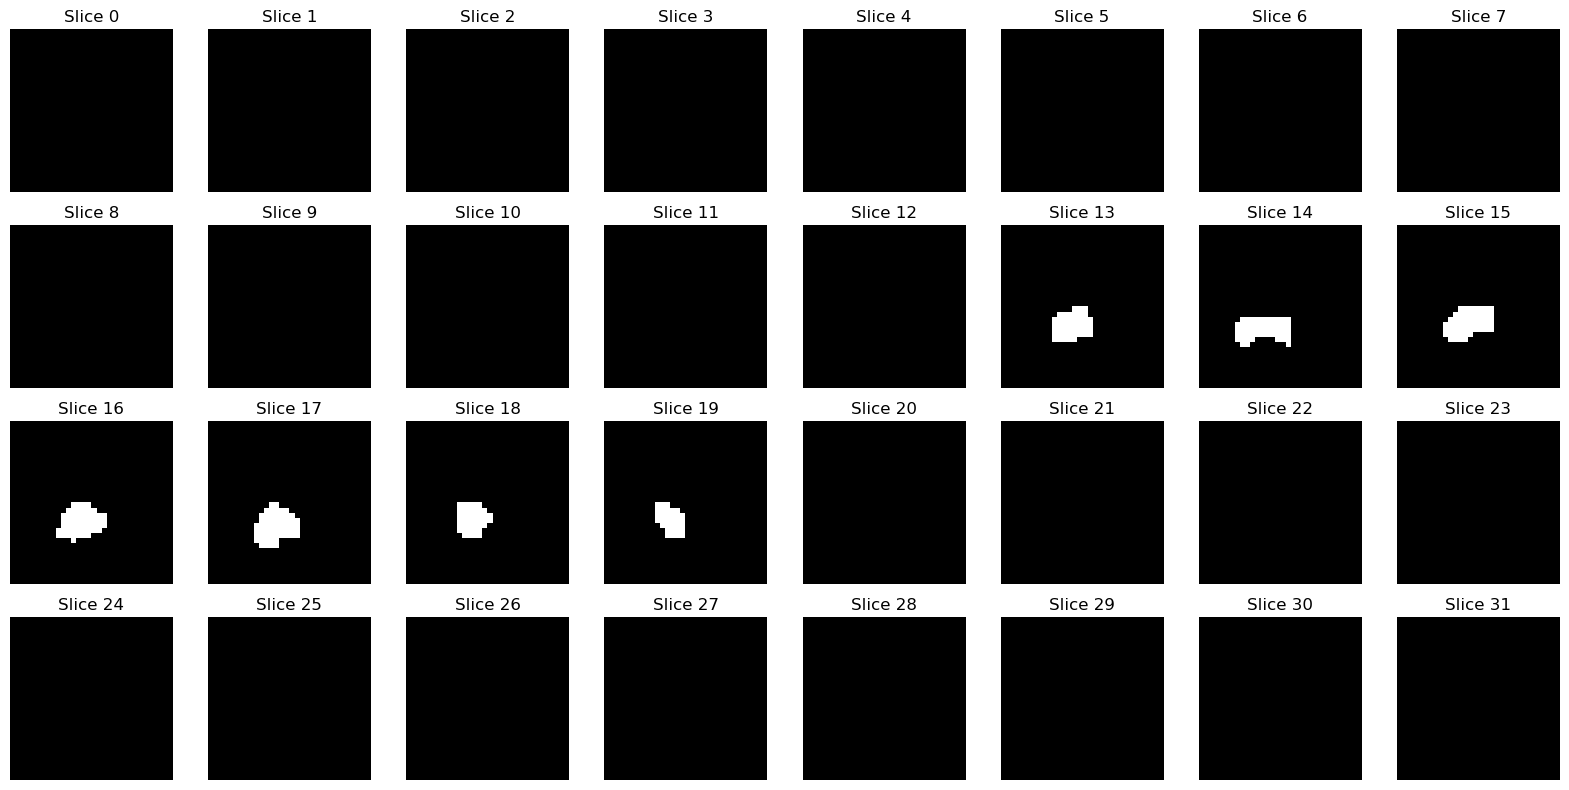

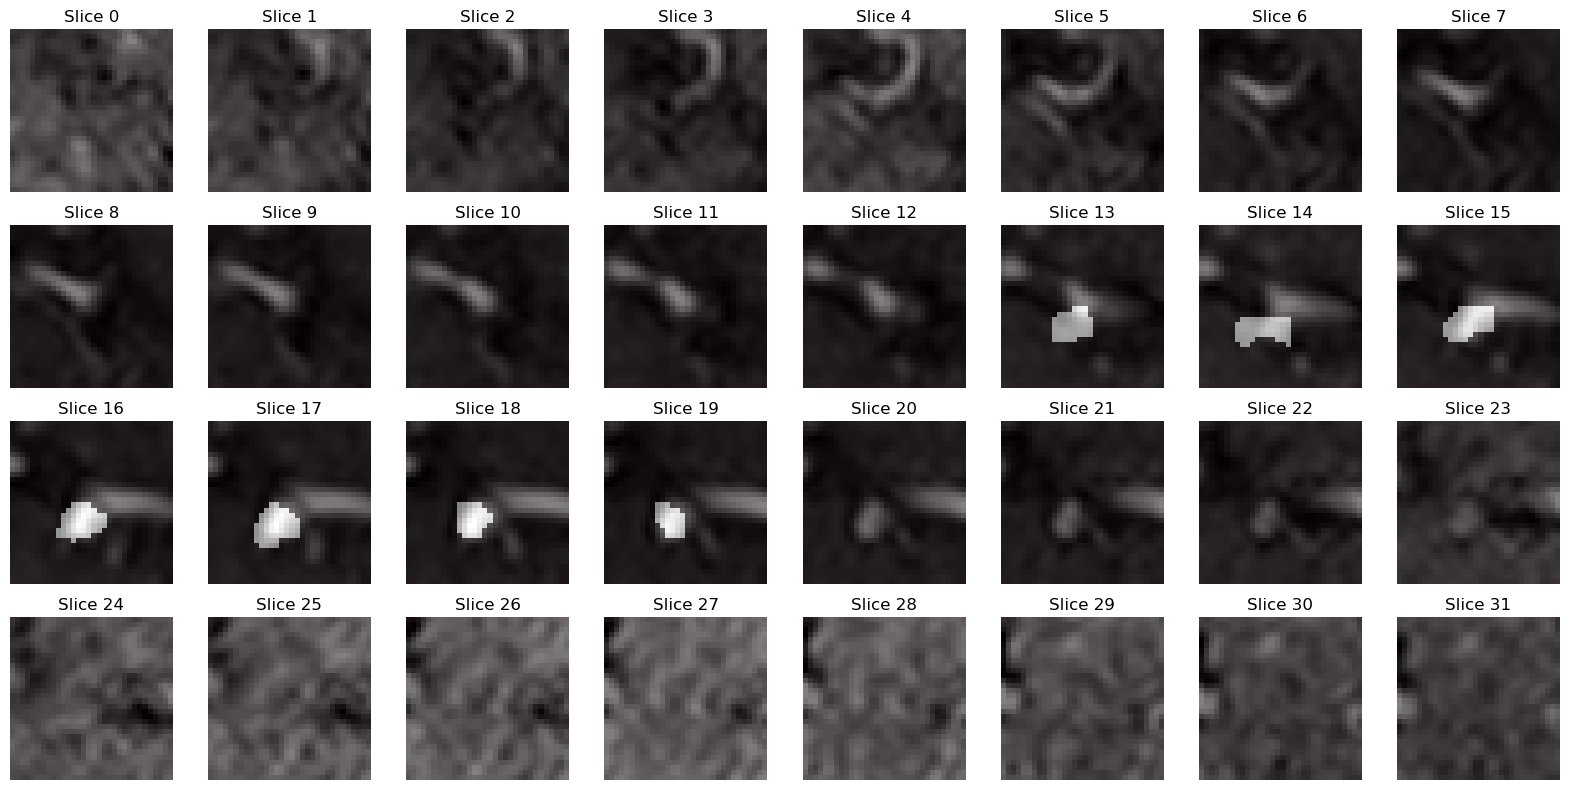

In [36]:
show_all_slices(rotated_data)
show_all_slices(rotated_mask)
show_all_slices_with_overlay(rotated_data, rotated_mask)

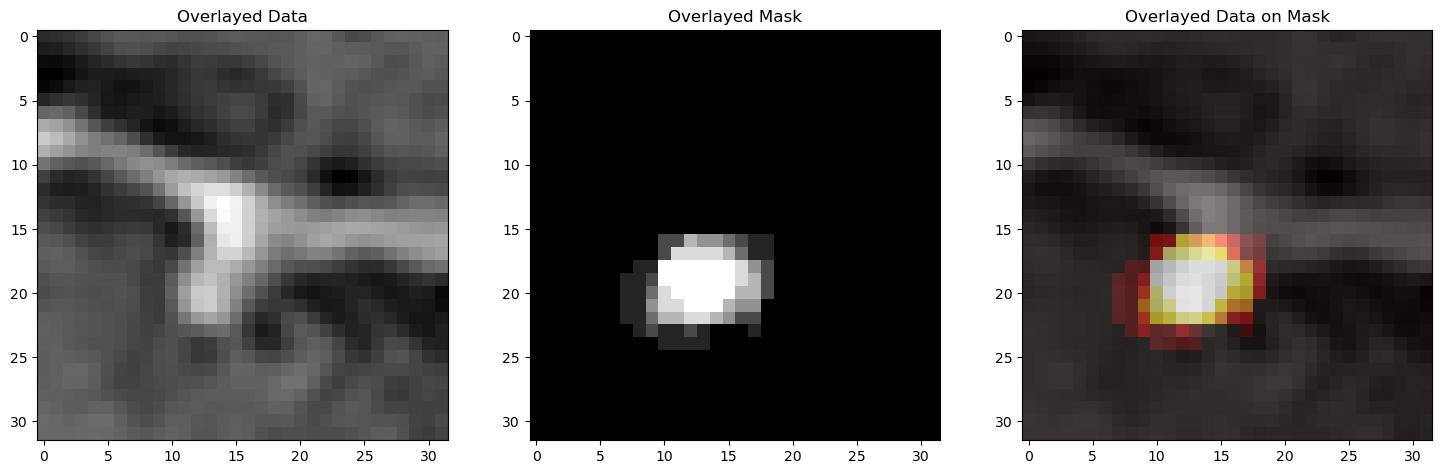

In [37]:
# overlayed rotated data, mask, and data on mask
overlayed_rotated_data, overlayed_rotated_mask, overlayed_rotated_data_on_mask = overlay_slices(rotated_data, rotated_mask, process_all_slices=True, average_slices=False)
visualize_overlay(overlayed_rotated_data, overlayed_rotated_mask, overlayed_rotated_data_on_mask)

In [38]:
# rotation matrix that rotates 90 degrees around the z axis
rotation_matrix_z = np.array([
    [np.cos(np.radians(90)), -np.sin(np.radians(90)), 0],
    [np.sin(np.radians(90)), np.cos(np.radians(90)), 0],
    [0, 0, 1]
])

# extract the elements that need to be rotated
direction_subset = direction[[1, 4, 7]]

# rotate 90 degrees around the z axis
rotated_direction_subset_z = np.dot(rotation_matrix_z, direction_subset)

# combine the rotated elements with the elements that don't need to be rotated
rotated_direction = direction.copy()
rotated_direction[[1, 4, 7]] = rotated_direction_subset_z

print("direction:", direction)
print("rotated_direction:", rotated_direction)

direction: [ 1.00000000e+00  1.18533117e-14 -2.13162821e-14  2.18574607e-14
 -4.77036791e-02  9.98861531e-01  1.08229520e-14 -9.98861531e-01
 -4.77036791e-02]
rotated_direction: [ 1.00000000e+00  4.77036791e-02 -2.13162821e-14  2.18574607e-14
  1.18503907e-14  9.98861531e-01  1.08229520e-14 -9.98861531e-01
 -4.77036791e-02]


In [39]:
# extract the coordinates of the aneurysm
coords = np.argwhere(rotated_mask == 1)

# calculate the centroid of the aneurysm
centroid = np.mean(coords, axis=0)

# print("coords:\n", coords)
print("Aneurysm centroid:", centroid)

Aneurysm centroid: [15.81952663 19.40828402 12.93491124]


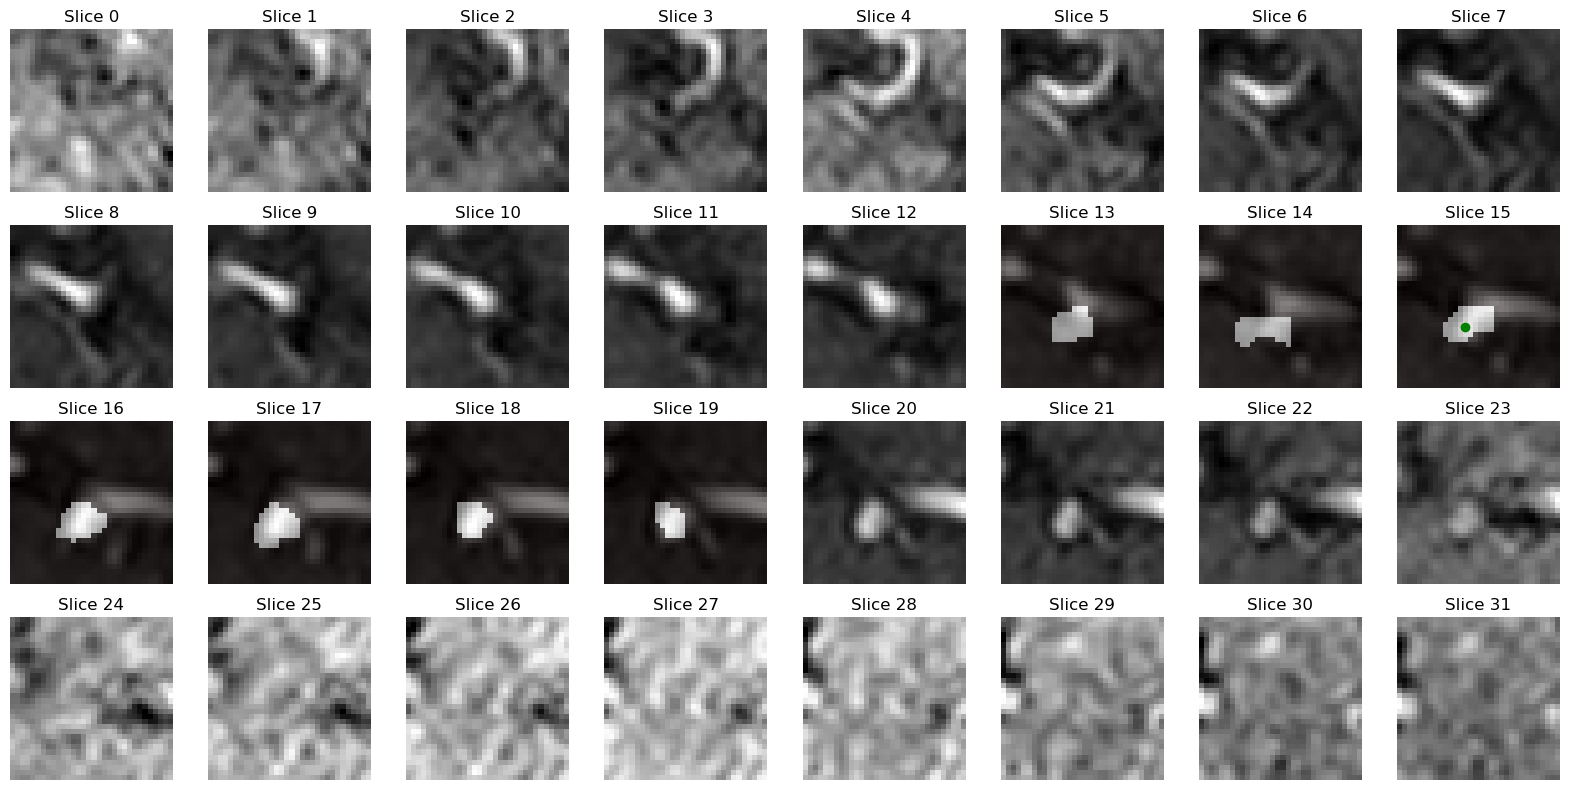

In [40]:
# Populate the mask with the aneurysm location based on the provided coordinates
for z, y, x in coords:
    mask[z, y, x] = 1

# Function to display slices with the centroid overlay
def show_slices_with_centroid(data, mask, centroid):
    num_slices = data.shape[0]
    cols = 8  # Number of slices per row
    rows = num_slices // cols + int(num_slices % cols != 0)  # Number of rows

    fig, axes = plt.subplots(rows, cols, figsize=(2 * cols, 2 * rows))
    axes = axes.flatten()

    # Loop through each slice
    for i in range(num_slices):
        axes[i].imshow(data[i, :, :], cmap='gray')
        if np.any(mask[i, :, :]):  # If there's anything to show in the mask
            axes[i].imshow(mask[i, :, :], cmap='hot', alpha=0.5)
            # If the centroid is within the current slice, display it
            if int(centroid[0]) == i:
                axes[i].plot(centroid[2], centroid[1], 'go')  # Mark the centroid with a green dot

        axes[i].set_title(f'Slice {i}')
        axes[i].axis('off')

    # Hide any remaining axes if there are fewer slices than subplots
    for i in range(num_slices, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# The 'coords' array is currently empty, we need the actual coordinates to proceed
# For now, let's simulate the centroid visualization with dummy data
# This is just a placeholder and will be replaced with the actual code once we have the coordinates
if coords.size > 0:
    show_slices_with_centroid(rotated_data, rotated_mask, centroid)
else:
    print("The 'coords' array is empty. Please provide the actual coordinates of the aneurysm.")

In [41]:
# Extracting the vessel direction from the rotated direction vector components
vessel_direction = rotated_direction[[1, 4, 7]]

# Now we need to find an arbitrary point on the plane perpendicular to this vessel_direction.
# To do this, we can use the cross product of the vessel_direction with two different basis vectors (e.g., [1, 0, 0] and [0, 1, 0]).
# This will yield vectors that are perpendicular to the vessel_direction.
# We can then translate these vectors to pass through the centroid of the aneurysm to get the actual perpendicular_vector.

# Choose basis vectors for creating a vector perpendicular to the vessel direction vector.
# If the vessel direction vector is not parallel to the x or y-axis, we can use [1, 0, 0] or [0, 1, 0].
basis_vector1 = np.array([1, 0, 0])
basis_vector2 = np.array([0, 1, 0])

# Calculate two vectors on the plane perpendicular to the vessel direction vector.
perpendicular_vector1 = np.cross(vessel_direction, basis_vector1)
perpendicular_vector2 = np.cross(vessel_direction, basis_vector2)

# Choose the perpendicular vector that is not zero in magnitude.
# A vector with zero magnitude indicates it is parallel to the vessel direction vector, so it cannot be used.
if norm(perpendicular_vector1) > 0:
    perpendicular_vector = perpendicular_vector1
else:
    perpendicular_vector = perpendicular_vector2

# Now we normalize the perpendicular_vector and translate it to pass through the centroid of the aneurysm.
# To select a point on the plane, we move one unit along this vector from the centroid of the aneurysm.
point_on_plane = centroid + perpendicular_vector / norm(perpendicular_vector)

# We can now calculate the vector that connects the centroid of the aneurysm to a point on the plane.
# This vector passes through the centroid of the aneurysm and is perpendicular to the vessel direction vector.
perpendicular_vector_through_centroid = point_on_plane - centroid
perpendicular_vector_through_centroid = perpendicular_vector_through_centroid / norm(perpendicular_vector_through_centroid)

print("perpendicular_vector_through_centroid:", perpendicular_vector_through_centroid)

perpendicular_vector_through_centroid: [ 0.00000000e+00 -1.00000000e+00 -1.24344979e-14]


In [42]:
# Calculate the normal to the plane defined by vessel_direction and perpendicular_vector
# This normal vector will be perpendicular to both vessel_direction and perpendicular_vector
plane_normal = np.cross(vessel_direction, perpendicular_vector_through_centroid)
plane_normal = plane_normal / norm(plane_normal)  # Normalize the vector

# Now we can define the plane with the normal vector and a point on the plane (the centroid)
# A plane is defined by the equation Ax + By + Cz + D = 0, where [A, B, C] is the plane normal
# and D can be found by plugging the point (centroid) into the plane equation
D = -plane_normal.dot(centroid)

# The plane equation is now defined as:
plane_equation = np.append(plane_normal, D)

print("Plane normal vector:", plane_normal)
print("Plane equation coefficients:", plane_equation)

Plane normal vector: [-9.98861531e-01  5.93171297e-16 -4.77036791e-02]
Plane equation coefficients: [-9.98861531e-01  5.93171297e-16 -4.77036791e-02  1.64185594e+01]


In [43]:
# Extracts a slice of the volume data based on a given plane
def extract_plane_slice(data, plane_normal, plane_offset, threshold=0.5):
    z, y, x = data.shape
    extracted_slice = np.zeros((y, x))

    for i in range(z):
        for j in range(y):
            for k in range(x):
                point = np.array([i, j, k])
                distance = np.abs(np.dot(plane_normal, point) + plane_offset)
                if distance <= threshold:
                    extracted_slice[j, k] = data[i, j, k]

    return extracted_slice

In [44]:
# Combines multiple slices into a single 2D image
def combine_slices(slices):
    combined_image = np.mean(slices, axis=0)
    return combined_image

# Creates and combines multiple slices from a 3D volume data
def create_and_combine_slices(volume, plane_normal, centroid, num_slices, slice_thickness):
    slices = []
    for i in range(-num_slices // 2, num_slices // 2):
        plane_offset = -np.dot(plane_normal, centroid) + i * slice_thickness
        slice = extract_plane_slice(volume, plane_normal, plane_offset)
        slices.append(slice)

    combined_image = combine_slices(slices)
    return combined_image

In [45]:
# Visualizes a single image
def visualize_image(image, title="Image"):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.show()

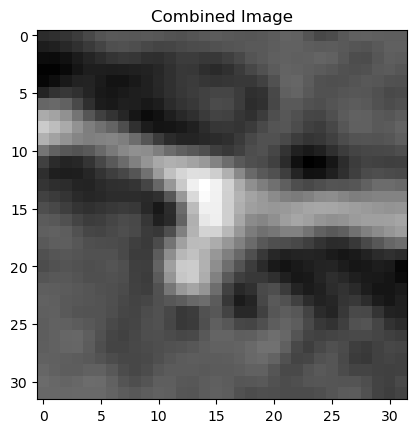

In [46]:
num_slices = 32 # Number of slices to create
slice_thickness = 1 # Thickness of each slice

combined_image = create_and_combine_slices(rotated_data, plane_normal, centroid, num_slices, slice_thickness)
visualize_image(combined_image, "Combined Image")